# Estimation of the filter length in Gaussian denoising using normalized cross-correlation in the Fourier domain (Self Fourier Ring Correlation)

In [1]:
import time
from collections import namedtuple

try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

import scipy.ndimage

try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

#from ipywidgets import *
try:
    import cv2
except:
    !pip install cv2
    import cv2
    
#import kernels
try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io

try:
    import information_theory as IT
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    import information_theory as IT

import utils

In [2]:
# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})
#rc('text', usetex=True)
#rc('font', family='serif')
#plt.rc('text.latex', preamble=r'\usepackage{amsmath} `...')
#mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amsfonts}'

In [3]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)

In [4]:
try:
    import denoising.image.gaussian as denoising
except:
    !pip install "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
    import denoising.image.gaussian as denoising

In [5]:
try:
    from self_fourier_shell_correlation import fsc_utils as fsc
except:
    !pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"
    from self_fourier_shell_correlation import fsc_utils as fsc

In [6]:
denoiser = denoising.Monochrome_Denoising(logger)

### barb

In [7]:
Args = namedtuple("args", "input")
args = Args("http://www.hpca.ual.es/~vruiz/images/barb.png")
#args = Args("http://www.hpca.ual.es/~vruiz/images/zelda.png")
#args = Args("http://www.hpca.ual.es/~vruiz/images/boats.png")
#args = Args("http://www.hpca.ual.es/~vruiz/images/lake.png")

In [8]:
image = skimage_io.imread(args.input)  # Ground Truth
X = image

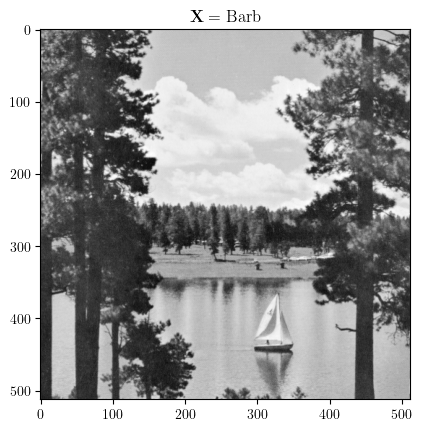

In [9]:
plt.title(r"$\mathbf{X}=\mathrm{Barb}$")
#plt.imshow(X, cmap="gray")
#plt.savefig('barb.pdf', bbox_inches='tight')
utils.imshow(X)

In [10]:
GAMMA = 0.15
STD_DEV = 80
POISSON_RATIO = 0.5

In [11]:
SFRC_curve = []
sigmas_kernel = [0.25, 0.5, 0.75, 1.0, 1.2, 1.5, 1.6, 2.0, 2.5]
sigmas_kernel = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.50, 2.75, 5]
#sigmas_kernel = [0.01, 0.5, 1.0, 1.25, 1.3, 1.35]
Y = utils.generate_MPGN(X, std_dev=STD_DEV, gamma=GAMMA, poisson_ratio=POISSON_RATIO)
#Y = np.clip(a = Y, a_min=0, a_max=255)
for i in sigmas_kernel:
    total_c_avg = 0
    kernel = [None]*2
    kernel[0] = utils.get_gaussian_kernel(i)
    kernel[1] = utils.get_gaussian_kernel(i)
    denoised = denoiser.filter(Y, kernel)
    freq, c_avg = fsc.get_SFRC_curve(denoised)
    SFRC_curve.append(c_avg)

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlati

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlati

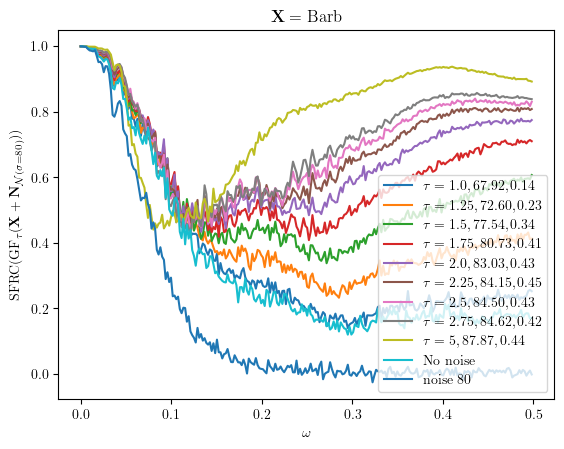

In [12]:
string  = r"$\mathbf{X}=\mathrm{Barb}$"
plt.title(string)
#plt.xlabel("Normalized spatial frequency")
plt.xlabel(r"$\omega$")
#plt.ylabel(r"$\mathrm{SFRC}(\tilde{\mathbf{X}})$")
plt.ylabel(r"$\mathrm{SFRC}(\mathrm{GF}_\tau(\mathbf{X}+\mathbf{N}_{\mathcal{N}(\sigma=" + rf"{STD_DEV}" + ")}))$")
markers = ['o', 's', '^', 'd', 'x', '*', 'v', 'p', 'h', '+']  # Add more markers if needed
#for i in range(len(sigmas_kernel)-1, 0, -1):
for i in range(len(sigmas_kernel)):
    plt.plot(freq[:(len(freq)>>0)],
             SFRC_curve[i][:(len(freq)>>0)],
             label=r"$\tau=" + f"{sigmas_kernel[i]}"
             + rf", {np.sum(SFRC_curve[i][:(len(freq)>>1)]):.2f}" # [:(len(freq)>>1)]
             + rf", {np.min(SFRC_curve[i]):.2f}"
             #+ rf", {(np.sum(SFRC_curve[i][:(len(freq)>>1)]) + np.sum(SFRC_curve[i][(len(freq)>>1):]):.2f)}"
             #+ rf", {np.sum(SFRC_curve[i]):.2f}"
             + r"$",
             marker=markers[i % len(markers)],
             markersize=0.0)
Y = X + np.random.normal(loc=0, scale=STD_DEV, size=X.shape).reshape(X.shape)
plt.plot(freq[:(len(freq)>>0)],
         fsc.get_SFRC_curve(X)[1],
         label="No noise")
plt.plot(freq[:(len(freq)>>0)],
         fsc.get_SFRC_curve(Y)[1],
         label=f"noise {STD_DEV}")
plt.legend()
plt.savefig("GF_SFRC_0MAGN_barb.pdf", bbox_inches='tight')

In [13]:
N_POINTS = 40
min_sigma_kernel = 0.5
max_sigma_kernel = 2.0
area_per_sigma_kernel_curves = []
std_devs = []
for s in range(20, 100, 20):
    std_devs.append(s)
    sigmas_kernel = []
    area_per_sigma_kernel_curve = []
    Y = utils.generate_MPGN(X, s, GAMMA)
    #Y = X + np.random.normal(loc=0, scale=s, size=X.shape).reshape(X.shape) # Mover fuera!!!!
    for i in range(N_POINTS):
        sigma_kernel = min_sigma_kernel + i*(max_sigma_kernel - min_sigma_kernel)/N_POINTS
        sigmas_kernel.append(sigma_kernel)
        kernel = [None]*2
        kernel[0] = utils.get_gaussian_kernel(sigma_kernel)
        kernel[1] = utils.get_gaussian_kernel(sigma_kernel)
        denoised = denoiser.filter(Y, kernel)
        freqs, c_avg = fsc.get_SFRC_curve(denoised)
        area = np.sum(c_avg)
        area_per_sigma_kernel_curve.append(area)
    area_per_sigma_kernel_curves.append(area_per_sigma_kernel_curve)

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlati

Text(0.5, 0, '$\\tau$')

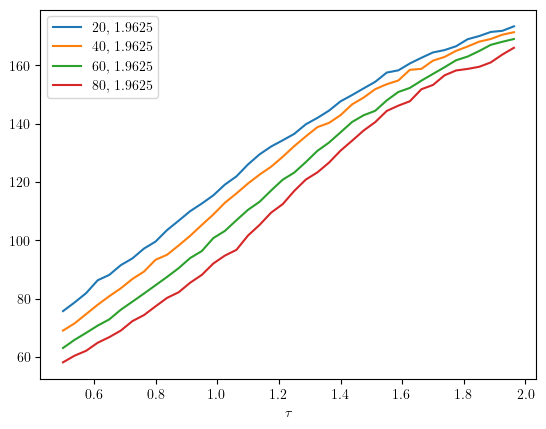

In [14]:
for i in range(len(area_per_sigma_kernel_curves)):
    plt.plot(
        sigmas_kernel,
        area_per_sigma_kernel_curves[i],
    label=f"{std_devs[i]}, {sigmas_kernel[np.argmax(area_per_sigma_kernel_curves[i])]}")
plt.legend()
plt.xlabel(r"$\tau$")


0.9999999999999999


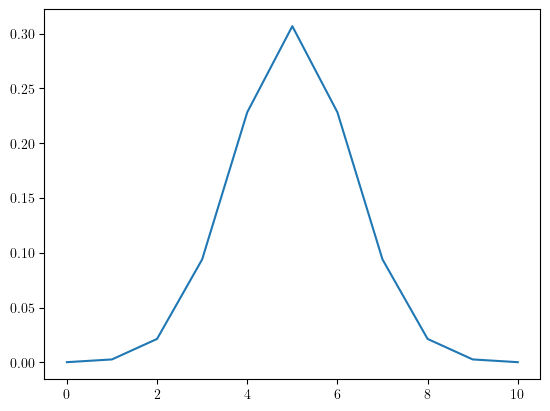

In [20]:
sigma_kernel = 1.3
sigma = np.array([sigma_kernel, sigma_kernel])
kernel = [None]*2
kernel[0] = utils.get_gaussian_kernel(sigma[0])
kernel[1] = utils.get_gaussian_kernel(sigma[1])
print(np.sum(kernel[0]))
plt.plot(kernel[0])
plt.show()

## Zero-mean Mixed Poisson-Gaussian (0MMPG) noise
\begin{equation}
  Y = N_{\mathcal{P}(\gamma X)}/\gamma + N_{\mathcal{N(\sigma)}}
\end{equation}
where
\begin{equation}
N_{\mathcal{P}(\gamma X)}\sim\mathcal{P}(λ=\gamma X)
\end{equation}
and
\begin{equation}
N_{\mathcal{N(\sigma)}}\sim{\mathcal N}(\mu=0, \sigma^2).
\end{equation}

In [15]:
POISSON_RATIO = 0.5

#### GF_SFRC_0MMPG_NL20_barb

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
0.25 compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_corr

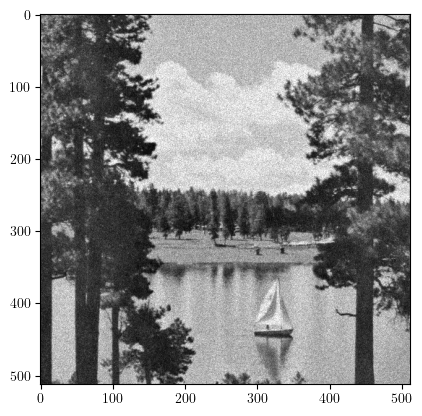

In [16]:
STD_DEV = 10 # Gaussian noise level
GAMMA = 0.15
#sigmas_kernel = [(0.25 + i/10) for i in range(20)]
#sigmas_kernel = [0.25, 0.5, 0.75, 1.0, 1.1, 1.2, 2.5]
#sigmas_kernel = [1.4, 1.7, 2.8]
sigmas_kernel = [i/20 for i in range(5, 50, 5)]
#sigmas_kernel = [i/80 for i in range(10, 100, 10)]
#sigmas_kernel = [0.55, 0.60, 0.65]
#sigmas_kernel.append(1.4)
#sigmas_kernel.sort()
#sigmas_kernel.append(1.4)
SFRC_curves = []
Y = utils.generate_MPGN(X, STD_DEV, GAMMA, POISSON_RATIO).reshape(X.shape)
utils.imshow(Y)
for i in sigmas_kernel:
    total_c_avg = 0
    kernel = [None]*2
    kernel[0] = utils.get_gaussian_kernel(i*2)
    kernel[1] = utils.get_gaussian_kernel(i*2)
    total_c_avg = np.zeros(X.shape[0]>>1)
    for j in range(1):
        #Y = np.clip(a = Y, a_min=0, a_max=255)
        denoised = denoiser.filter(Y, kernel)
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        freq, c_avg = fsc.get_SFRC_curve(denoised)
        #freq, c_avg = fsc.get_SFRC_curve(X)
        freq = freq[:(len(freq)>>0)]
        c_avg = c_avg[:(len(c_avg)>>0)]
        total_c_avg += c_avg
    SFRC_curves.append(total_c_avg/1)
    print(i, end=' ')


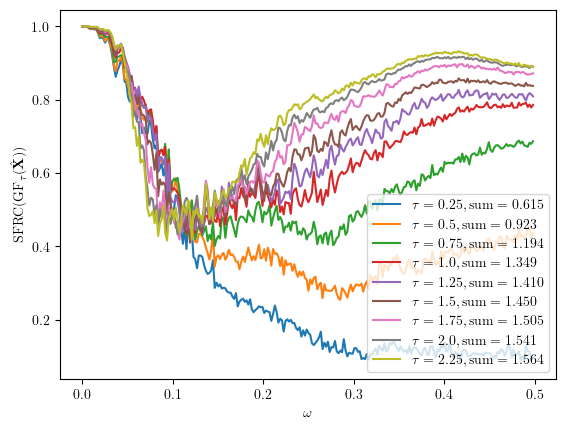

In [17]:
#plt.title(r"$\mathbf{X}=\mathrm{Barb}$")
plt.xlabel(r"$\omega$")
string  = r"$\mathrm{SFRC}"
string += r"(\mathrm{GF}_\tau("
#string += r"\mathbf{X} + \mathbf{N}_{\mathcal{N}"
#string += r"(\sigma="
#string += f"{std_dev}"
#string += r")}"
#string += r"+ \mathbf{N}"
#string += r"_{\mathcal{P}("
#string += rf"{gamma}"
#string += r"\mathbf{X})}/" + rf"{gamma}"
string += r"\hat{\mathbf{X}}"
string += r"))$"
plt.ylabel(string)
#plt.ylabel(r"$\mathrm{SFRC}(\tilde{\mathbf{X}})$")
markers = ['o', 's', '^', 'd', 'x', '*', 'v', 'p', 'h', '+']  # Add more markers if needed
for i in range(0, len(sigmas_kernel), 1):
#for i in range(len(sigmas_kernel)-1, 0, -1):
    #plt.plot(freq, curve[i], label=r"$\tau=" + f"{sigmas_kernel[i]}" + r"$", marker=markers[(len(sigmas_kernel)-i-1) % len(markers)], markersize=0.0)
    #plt.plot(freq, curve[i], label=r"$\tau=" + f"{sigmas_kernel[len(sigmas_kernel)-i-1]}" + r"$", marker=markers[(len(sigmas_kernel)-i-1) % len(markers)], markersize=0.0)
    #if sigmas_kernel[i] != 1.4:
    #    plt.plot(
    #        freq,
    #        curve[i],
    #        label=r"$\tau=" + f"{sigmas_kernel[i]}"
    #        + r", \mathrm{sum}="
    #        + f"{np.sum(curve[i]):.2f}"
    #        + r"$", marker=markers[i % len(markers)],
    #        markersize=0.0)
    #else:
    plt.plot(
        freq,#[:len(c_avg)>>1],
        SFRC_curves[i], # [noise level][kernel length]
        label=r"$\tau=" + f"{sigmas_kernel[i]}"
        + r", \mathrm{sum}="
        + f"{np.sum(SFRC_curves[i])/128:.3f}"
        + r"$", marker=markers[i % len(markers)],
        markersize=0.0)

plt.legend()
plt.savefig("GF_SFRC_0MMPG_NL20_barb.pdf", bbox_inches='tight')

#### GF_SFRC_0MMPG_NL60_barb

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
0.25 compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_corr

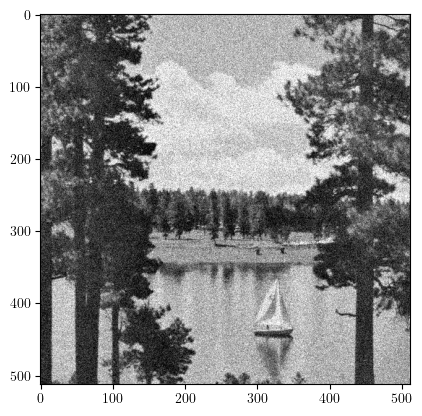

In [18]:
STD_DEV = 40 # Gaussian noise level
GAMMA = 0.15
#sigmas_kernel = [(0.25 + i/10) for i in range(20)]
#sigmas_kernel = [0.25, 0.5, 0.75, 1.0, 1.1, 1.2, 2.5]
#sigmas_kernel = [1.4, 1.7, 2.8]
#sigmas_kernel = [i/80 for i in range(10, 100, 10)]
#sigmas_kernel = [0.60, 0.65, 0.7]
#sigmas_kernel.append(1.4)
#sigmas_kernel.sort()
#sigmas_kernel.append(1.4)
SFRC_curves = []
gamma = 0.15
Y = utils.generate_MPGN(X, STD_DEV, GAMMA, POISSON_RATIO).reshape(X.shape)
utils.imshow(Y)
for i in sigmas_kernel:
    total_c_avg = 0
    kernel = [None]*2
    kernel[0] = utils.get_gaussian_kernel(i*2)
    kernel[1] = utils.get_gaussian_kernel(i*2)
    total_c_avg = np.zeros(X.shape[0]>>1)
    for j in range(1):
        #Y = np.clip(a = Y, a_min=0, a_max=255)
        denoised = denoiser.filter(Y, kernel)
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        freq, c_avg = fsc.get_SFRC_curve(denoised)
        #freq, c_avg = fsc.get_SFRC_curve(X)
        freq = freq[:(len(freq)>>0)]
        c_avg = c_avg[:(len(c_avg)>>0)]
        total_c_avg += c_avg
    SFRC_curves.append(total_c_avg/1)
    print(i, end=' ')

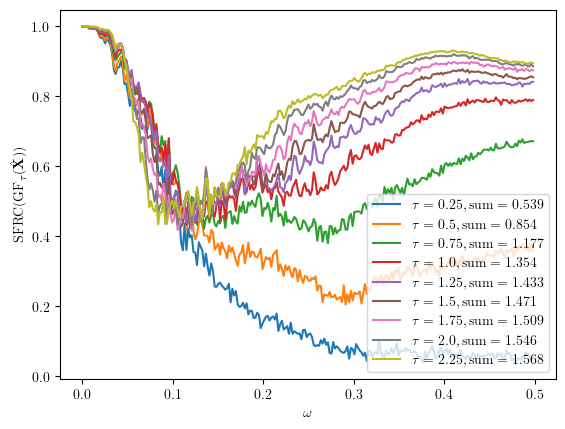

In [19]:
#plt.title(r"$\mathbf{X}=\mathrm{Barb}$")
plt.xlabel(r"$\omega$")
string  = r"$\mathrm{SFRC}"
string += r"(\mathrm{GF}_\tau("
#string += r"\mathbf{X} + \mathbf{N}_{\mathcal{N}"
#string += r"(\sigma="
#string += f"{std_dev}"
#string += r")}"
#string += r"+ \mathbf{N}"
#string += r"_{\mathcal{P}("
#string += rf"{gamma}"
#string += r"\mathbf{X})}/" + rf"{gamma}"
string += r"\hat{\mathbf{X}}"
string += r"))$"
plt.ylabel(string)
#plt.ylabel(r"$\mathrm{SFRC}(\tilde{\mathbf{X}})$")
markers = ['o', 's', '^', 'd', 'x', '*', 'v', 'p', 'h', '+']  # Add more markers if needed
for i in range(0, len(sigmas_kernel), 1):
#for i in range(len(sigmas_kernel)-1, 0, -1):
    #plt.plot(freq, curve[i], label=r"$\tau=" + f"{sigmas_kernel[i]}" + r"$", marker=markers[(len(sigmas_kernel)-i-1) % len(markers)], markersize=0.0)
    #plt.plot(freq, curve[i], label=r"$\tau=" + f"{sigmas_kernel[len(sigmas_kernel)-i-1]}" + r"$", marker=markers[(len(sigmas_kernel)-i-1) % len(markers)], markersize=0.0)
    #if sigmas_kernel[i] != 1.4:
    #    plt.plot(
    #        freq,
    #        curve[i],
    #        label=r"$\tau=" + f"{sigmas_kernel[i]}"
    #        + r", \mathrm{sum}="
    #        + f"{np.sum(curve[i]):.2f}"
    #        + r"$", marker=markers[i % len(markers)],
    #        markersize=0.0)
    #else:
    plt.plot(
        freq,#[:len(c_avg)>>1],
        SFRC_curves[i], # [noise level][kernel length]
        label=r"$\tau=" + f"{sigmas_kernel[i]}"
        + r", \mathrm{sum}="
        + f"{np.sum(SFRC_curves[i])/128:.3f}"
        + r"$", marker=markers[i % len(markers)],
        markersize=0.0)

plt.legend()
plt.savefig("GF_SFRC_0MMPG_NL60_barb.pdf", bbox_inches='tight')

In [ ]:
input()

In [ ]:
sigmas_kernel = [i/20 for i in range(5, 50, 5)]
sigmas_kernel.append(1.4)
sigmas_kernel.sort()
#sigmas_kernel.append(1.4)
SFRC_curves = []
Y = MPG_noise(X, STD_DEV, GAMMA).reshape(X.shape)
for i in sigmas_kernel:
    total_c_avg = 0
    kernel = [None]*2
    kernel[0] = get_gaussian_kernel(i)
    kernel[1] = get_gaussian_kernel(i)
    denoised = denoiser.filter(Y, kernel)
    PCC = np.corrcoef(denoised[:, ::2].flatten(), denoised[:, 1::2].flatten())[0, 1]
    print("sigma_kernel:", i, "PCC:", PCC)


In [ ]:
input()

In [ ]:
len(freq[:len(c_avg)>>1])

In [ ]:
len(SFRC_curves[0][0])

In [ ]:
noise_level = 2

#plt.title(r"$\mathbf{X}=\mathrm{Barb}$")
plt.xlabel(r"$\omega$")
string  = r"$\mathrm{SFRC}"
string += r"(\mathrm{GF}_\tau("
#string += r"\mathbf{X} + \mathbf{N}_{\mathcal{N}"
#string += r"(\sigma="
#string += f"{std_dev}"
#string += r")}"
#string += r"+ \mathbf{N}"
#string += r"_{\mathcal{P}("
#string += rf"{gamma}"
#string += r"\mathbf{X})}/" + rf"{gamma}"
string += r"\hat{\mathbf{X}}"
string += r"))$"
plt.ylabel(string)
#plt.ylabel(r"$\mathrm{SFRC}(\tilde{\mathbf{X}})$")
markers = ['o', 's', '^', 'd', 'x', '*', 'v', 'p', 'h', '+']  # Add more markers if needed
for i in range(0, len(sigmas_kernel), 1):
#for i in range(len(sigmas_kernel)-1, 0, -1):
    #plt.plot(freq, curve[i], label=r"$\tau=" + f"{sigmas_kernel[i]}" + r"$", marker=markers[(len(sigmas_kernel)-i-1) % len(markers)], markersize=0.0)
    #plt.plot(freq, curve[i], label=r"$\tau=" + f"{sigmas_kernel[len(sigmas_kernel)-i-1]}" + r"$", marker=markers[(len(sigmas_kernel)-i-1) % len(markers)], markersize=0.0)
    #if sigmas_kernel[i] != 1.4:
    #    plt.plot(
    #        freq,
    #        curve[i],
    #        label=r"$\tau=" + f"{sigmas_kernel[i]}"
    #        + r", \mathrm{sum}="
    #        + f"{np.sum(curve[i]):.2f}"
    #        + r"$", marker=markers[i % len(markers)],
    #        markersize=0.0)
    #else:
    plt.plot(
        freq[:len(c_avg)>>1],
        SFRC_curves[noise_level][i], # [noise level][kernel length]
        label=r"$\tau=" + f"{sigmas_kernel[i]}"
        + r", \mathrm{sum}="
        + f"{np.sum(SFRC_curves[noise_level][i]):.2f}"
        + r"$", marker=markers[i % len(markers)],
        markersize=0.0)

plt.legend()
plt.savefig("GF_SFRC_0MMPG_barb.pdf", bbox_inches='tight')

In [ ]:
noise_level = 4

sums = []
for i in range(0, len(sigmas_kernel), 1):
    _sum = np.sum(SFRC_curves[noise_level][i])
    print(i, sigmas_kernel[i], f"{_sum:.2f}")
    sums.append(_sum)

In [ ]:
arg_max = np.argmax(sums)
print(arg_max)

In [ ]:
optimal_filter_length = sigmas_kernel[arg_max] / 2

In [ ]:
print(optimal_filter_length)

In [ ]:
for noise_level in range(5):
    sums = []
    for filter_length_index in range(0, len(sigmas_kernel), 1):
        _sum = np.sum(SFRC_curves[noise_level][filter_length])
        print(filter_length_index, sigmas_kernel[filter_length_index], f"{_sum:.2f}")
        sums.append(_sum)
    arg_max = np.argmax(sums)
    print("arg_max:", arg_max)
    optimal_filter_length = sigmas_kernel[arg_max] / 2
    print("Optimal filter length:", optimal_filter_length)